# The FIRST IRIS DATASET PLAYGROUND

The iris dataset contains measurements for $n=150$ iris flowers from three different classes, namely:

* Iris-setosa ($n_{se}=50$)
* Iris-versicolor ($n_{ve}=50$)
* Iris-virginica ($n_{vi}=50$).

Moreover, we have the following $d=4$ features:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap


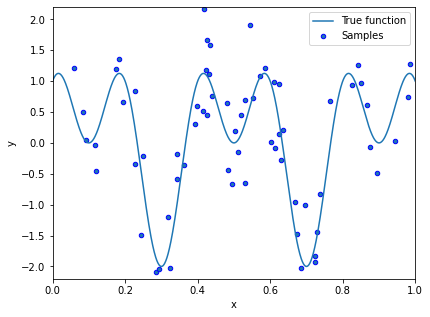

In [2]:
#Try out polynomials of degrees 1, 5, 20, and 70. Choose the polynomial which fits best the data points (without overfitting) and plot it. 

def function(x):
    return np.sin(5 * np.pi * x) + np.cos(10 * np.pi * x)

np.random.seed(123)
n_samples = 70

# data points
x = np.sort(np.random.rand(n_samples))
y = function(x) + np.random.randn(n_samples) * 0.5

# plot function with noise

plt.figure(figsize=(6.5, 5))    
# plot function
x_test = np.linspace(0, 1, 1000)
plt.plot(x_test, function(x_test), label="True function")
# plot points defined by x and y
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
    # define plot range
plt.xlim((0, 1))
plt.ylim((-2.2, 2.2))
plt.legend(loc="best")
plt.show()    

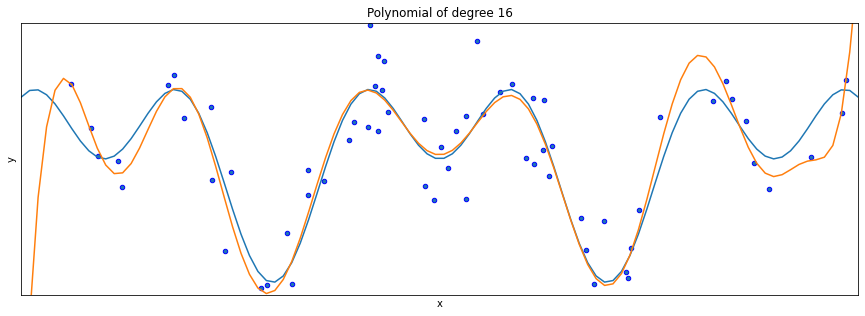

In [3]:
# fit data points with a polynomial of degree n and plot it
degrees = [16]
nrows = int(np.sqrt(len(degrees)))
ncols = int(np.ceil(np.sqrt(len(degrees))))
plt.figure(figsize=(15, 5*nrows))
    
    # plot function, points defined by x and y 
    # and polynomials fitting to the points
for i in range(len(degrees)):
    # set up subplot
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.set_title(f"Polynomial of degree {degrees[i]}")
    plt.setp(ax, xticks=(), yticks=())
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2.2, 2.2))
        
    # fit polynomial to points
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)
        
    # plot everyhing
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, function(x_test), label="True function")
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")

In [4]:
# load the iris dataset and display the first elements
def load_iris() -> pd.DataFrame:
    """
    Load iris data set [1].

    [1] Fisher,R.A. - The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936)

    :return: iris data set
    """
    iris_data = datasets.load_iris()
    data = pd.DataFrame(iris_data[r'data'], columns=iris_data[r'feature_names'])
    data[r'sepal length'] = data[r'sepal length (cm)']
    data[r'sepal width'] = data[r'sepal width (cm)']
    data[r'petal length'] = data[r'petal length (cm)']
    data[r'petal width'] = data[r'petal width (cm)']
    data[r'target'] = iris_data[r'target']
    return data

iris = load_iris()
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,4.9,3.1,1.5,0.1,0


In [5]:
# separate features and labels
feature_names = ['sepal length','sepal width','petal length', 'petal width']
X = iris[feature_names]
y = iris['target']

print(X)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


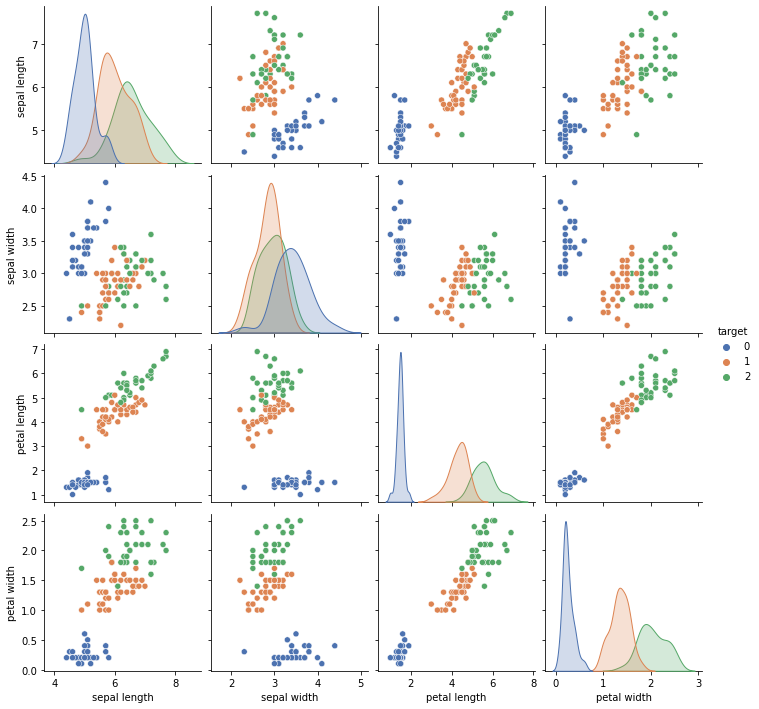

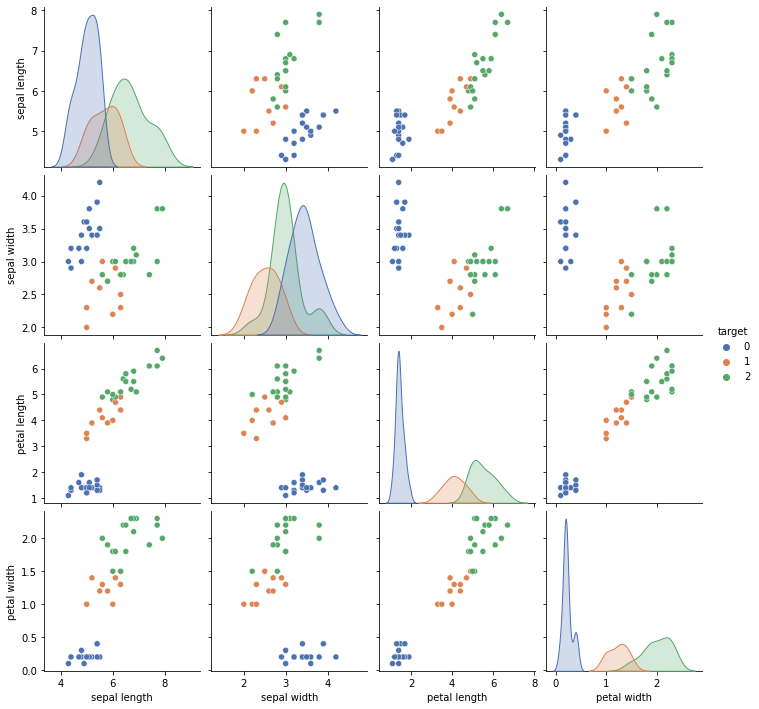

In [6]:
# split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# plot the scatter matrices
# plot train split
_ = sns.pairplot(pd.concat([X_train, y_train], axis=1), vars=X, hue='target', palette="deep")
# plot test split
_ = sns.pairplot(pd.concat([X_test, y_test], axis=1), vars=feature_names, hue='target', palette="deep")

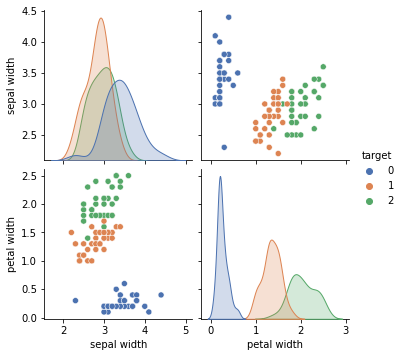

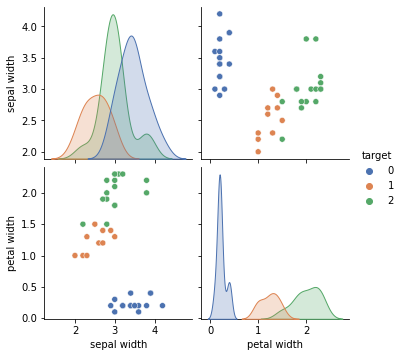

In [7]:
# select a subset of features 
feature_names_subset = ['sepal width', 'petal width']
X_train_subset = X_train[feature_names_subset]
X_test_subset = X_test[feature_names_subset]

# plot train split
_ = sns.pairplot(pd.concat([X_train_subset, y_train], axis=1), hue='target', palette="deep")
# plot test split
_ = sns.pairplot(pd.concat([X_test_subset, y_test], axis=1), hue='target', palette="deep")

In [8]:
# fit the model - k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_subset, y_train)
# print out the accuracies
print('Accuracy k=1 on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
print('Accuracy k=1 on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))

# fit the model - k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_subset, y_train)
# print out the accuracies
print('Accuracy k=3 on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
print('Accuracy k=3 on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))

# fit the model - k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_subset, y_train)
# print out the accuracies
print('Accuracy k=5 on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
print('Accuracy k=5 on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))


Accuracy k=1 on training set: 0.9905
Accuracy k=1 on test set: 0.9333
Accuracy k=3 on training set: 0.9524
Accuracy k=3 on test set: 0.9333
Accuracy k=5 on training set: 0.9619
Accuracy k=5 on test set: 0.9556


<ipython-input-9-88c46bf7c4fe>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x2, y2, pred, cmap=ListedColormap(color_list_light))


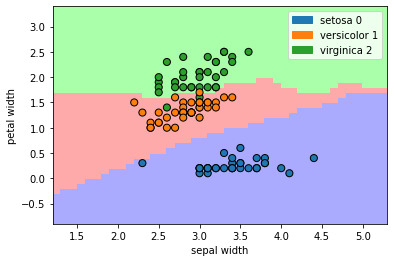

In [9]:
# plot the decision boundaries
target_names = ['setosa 0', 'versicolor 1', 'virginica 2']


def plot_knn_regions(X: pd.DataFrame, y: list, feature_names: list, n_neighbors: int, target_names: list = None) -> None:
    """
    Plot the decision boundaries of a k-nearest neighbors classifier by spanning a grid on the data
    and generating a prediction for each point in the grid. Additionally, overlay the original 
    data.
    
    :param X: features
    :param y: labels
    :param feature_names: names of selected features
    :param n_neighbors: parameter k of the kNN classifier
    :param target_names: class names for legend
    """
    assert (len(feature_names) == 2)
    
    X_mat = X[feature_names].values
    y_mat = y.values
    
    # define color scheme
    color_list_light = ['#AAAAFF', '#FFAAAA', '#AAFFAA']
    color_list_bold = ['C0', 'C1', 'C2']

    classifier = KNeighborsClassifier(n_neighbors, weights='uniform')
    classifier.fit(X_mat, y_mat)
    
    # set up grid of points defined by range of x and y
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    x2, y2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # get predictions of the classifier for each point in the grid
    pred = classifier.predict(np.c_[x2.ravel(), y2.ravel()]).reshape(x2.shape)

    # plot decision boundaries
    plt.figure()
    plt.pcolormesh(x2, y2, pred, cmap=ListedColormap(color_list_light))

    # plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=50, c=y, cmap=ListedColormap(color_list_bold), edgecolor='black')
    plt.xlim(x2.min(), x2.max())
    plt.ylim(y2.min(), y2.max())
    
    # add legend
    if target_names:
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)
    
    # set labels
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    
    plt.show()
    
    
plot_knn_regions(X_train_subset, y_train, feature_names_subset, n_neighbors=5, target_names = target_names)